In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pylab
import math
import sys
import operator

import inspect
import lmfit
from lmfit import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
from scipy import fftpack
from scipy.integrate import trapz
from operator import itemgetter
from skimage import util
from scipy import stats
from numpy import NaN, Inf, arange, isscalar, asarray, array

Weird! It is:  181.56156156156158


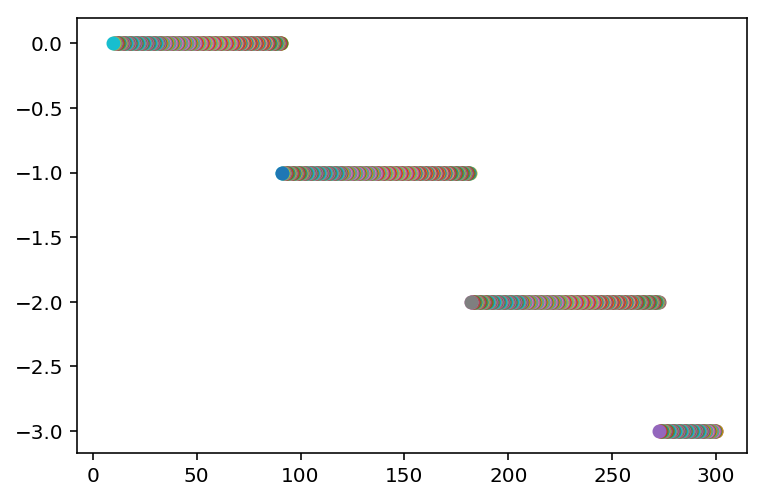

In [3]:
sd25 = -0.0516158
sd36 = -0.0915604
sd5 = -0.1534727
sd6 = -0.2010183
sd8 = -0.2906768
sd9 = -0.3335995
his05 = -0.18018580
hms036 = -0.075412200
hms08 = -0.25370290
lms05 = -0.14615960
lis05 = -0.1173279
lis08 = -0.2201747
sd = lis08
ky = 0.05
def nexc(x, shat=sd, ky=ky):    
    if Lx[-1] <= 1:
        print('input is kx')
        nexc= np.ceil(0.9*(2*np.pi/x)*(shat)*ky)
    elif x[-1] >=1:
        print('input is Lx')
        nexc= np.ceil(0.9*Lx*(shat)*ky)
    return nexc
def nexc_single(x, shat, ky):
    if x <= 1:
        #print('input is kx')
        nexc= np.ceil(0.9*(2*np.pi/x)*(shat)*ky)
    elif x >= 1:
        # print('input is Lx')
        nexc= np.ceil(x*(shat)*ky)
    return nexc

#shatspace = np.linspace(-0.2010183, -0.0516158, 1000)

Lx_test = np.linspace(10, 300, 1000)
#kx_test = np.linspace(0.0006, 0.05, 1000)

button = False
plt.figure()
for n in range(len(Lx_test)):
    m = len(Lx_test)-1-n
    if nexc_single(Lx_test[m], sd, ky) == -1 and button == False:
        print('Weird! It is: ', Lx_test[m])
        button = True
        #break
    plt.scatter(Lx_test[m], nexc_single(Lx_test[m], sd, ky))
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
for n in range(1, 17):
    if n <= 9:
        data = pylab.loadtxt('W7Xsds06/GAM/scan50-200/gamdiagions_000{0}.dat'.format(n))
    else:
        data = pylab.loadtxt('W7Xsds06/GAM/scan50-200/gamdiagions_00{0}.dat'.format(n))
    dat = np.sqrt(data[:, 1]**2 + data[:, 2]**2)
    dat0 = np.sqrt(data[0, 1]**2 + data[0, 2]**2)
    plt.plot(data[:, 0], dat/dat0, label=b[n+3])
#plt.xscale('log')
plt.legend()
plt.show()

In [ ]:
time = pylab.loadtxt('W7Xsds09/ITGa_NL/omt1_64/gamdiagions_act.dat')[:, 0]
chi = pylab.loadtxt('W7Xsds09/ITGa_NL/omt1_64/nrgphasionsChi_es_act.dat')
spectra = pylab.loadtxt('W7Xsds09/ITGa_NL/omt1_64/spectraions_act.dat')
timechi = pylab.loadtxt('W7Xsds09/ITGa_NL/omt1_64/nrgtstepions_act.dat')
## Values to be modified according to the simulation
nky0 = 96
nkx0 = 32
Ro = 5.5079880
Lr = 0.5387892
factor = ((1/Lr)/(1/Ro))**2
kymin = 0.05
kxmin = 0.1048
tim = len(time)

In [ ]:
time = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/gamdiagions_act.dat'.format(n))[:, 0]
chi = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/nrgphasionsChi_es_act.dat')
spectra = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/spectraions_act.dat')
timechi = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/nrgtstepions_act.dat')
## Values to be modified according to the simulation
nky0 = 96
nkx0 = 48
Ro = 5.5079880
Lr = 0.5387892
factor = ((1/Lr)/(1/Ro))**2
kymin = 0.05
kxmin = 0.0913
tim = len(time)

In [ ]:
time = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/gamdiagions_1_act.dat'.format(n))[:, 0]
chi = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/nrgphasionsChi_es_1_act.dat')
spectra = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/spectraions_1_act.dat')
timechi = pylab.loadtxt('W7Xsds08/ITGa_NL/omt2/nrgtstepions_1_act.dat')
## Values to be modified according to the simulation
nky0 = 96
nkx0 = 48
Ro = 5.5079880
Lr = 0.5387892
factor = ((1/Lr)/(1/Ro))**2
kymin = 0.05
kxmin = 0.0913
tim = len(time)

In [ ]:
## Just a plot to see how the Chi coefficient looks in .nrg time units
plt.figure()
plt.plot(timechi[:, 0], chi[:np.int(chi.size/2)])
plt.show()

In [ ]:
## Get all the indexes of the timescale of Xi that coincide with the time in the mom file
chi2 = np.zeros((tim))
timechi2 = np.zeros((tim))
for i in range(0, tim):
    idx = (np.abs(timechi[:, 0] - time[i])).argmin() 
    timechi2[i] = timechi[idx, 0]
    chi2[i] = chi[idx]
plt.figure()
plt.plot(timechi2, chi2)
plt.show()

In [ ]:
## initialisation of all the placeholders
ky = np.zeros((tim, nkx0, nky0))
kx = np.zeros((tim, nkx0))
phi = np.zeros((tim, nkx0, nky0))
St = np.zeros((tim, nky0))
T = np.zeros((tim))
Sz = np.zeros((tim, nkx0))
Z = np.zeros((tim))

for m in range(0, nkx0):  # Make a loop over all the kx points
    for n in range(0, tim): # Make a loop over all the timesteps
        lo = ( 0 + (n*nky0) + (m*tim*nky0) )
        hi = ( nky0 + (n*nky0) + (m*tim*nky0) )
        ky[n, m] = spectra[lo:hi, 0]  # Save these values according to their position
        phi[n, m] = spectra[lo:hi, 1]

## Now invert the order of the loops and take the integral with all the timesteps
for n in range(0, tim):
    for m in range(0, nkx0):
        np.add(St[n], phi[n, m-1]*factor/kymin, out=St[n], where=True)
    T[n] = (0.5) * trapz(St[n], x=ky[0, 0])
    
for r in range(0, tim):  # Over all the times, extract the zonal flow component
    lo = (nky0*nkx0*tim) + (nkx0*r)  # basis index plus n times the ammount of nkx0
    top = lo + nkx0  # take it to the edge
    kx[r] = spectra[lo:top, 0]  
    Sz[r] = spectra[lo:top, 1] * factor / kxmin
    Z[r] = (0.5) * trapz(Sz[r], x=kx[r])  # Notice the 1/2 factor

In [ ]:
## This is just a plot to chech that the values have been assigned correctly
plt.figure(figsize=(12, 5))
plt.plot(time, T, label='Te')
plt.plot(time, Z, label='Zet')
plt.plot(time[2:], T[2:]/np.sqrt(Z[2:]), label='T / sqrt Z')
plt.xlabel('Time')
plt.ylabel('Magnitude (a.u.)')
plt.legend()
plt.show()

In [ ]:
## Now the most important: the graphocs that compare ZF and turbulent oscillations against Xi es
import matplotlib.cm as cm
plt.figure(figsize=(12, 5))
x = T
ys = np.sqrt(Z)
plt.plot(x, ys, color='k', linewidth=0.2)
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for x, y, c in zip(x, ys, colors):
    plt.scatter(x, y, color=c)
plt.xlabel('T')
plt.ylabel('Z$^{1/2}$')
plt.show()

plt.figure(figsize=(12, 5))
x = T
ys = chi2
plt.plot(x, ys, color='k', linewidth=0.2)
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for x, y, c in zip(x, ys, colors):
    plt.scatter(x, y, color=c)
plt.xlabel('T')
plt.ylabel('$\\chi$')
plt.show()

plt.figure(figsize=(12, 5))
x = T[2:]/np.sqrt(Z[2:])
ys = chi2[2:]
plt.plot(x, ys, color='k', linewidth=0.2)
colors = cm.rainbow(np.linspace(0, 1, len(ys)))
for x, y, c in zip(x, ys, colors):
    plt.scatter(x, y, color=c)
plt.xlabel('T / Z$^{1/2}$')
plt.ylabel('$\\chi$')
plt.show()